In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.table import Table
import astropy.units as u

plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 24,
    'axes.labelsize': 'large',
    'mathtext.fontset': 'stix'
})

In [2]:
with fits.open('/data2/lsajkov/mpdg/data/DESI/edr_galaxy_stellarmass_lineinfo_v1.0.fits') as edr_cat:
    edr_cat = Table(edr_cat[1].data)

In [3]:
flux_r = edr_cat['FLUX_R']
r_snr  = edr_cat['FLUX_R'] * np.sqrt(edr_cat['FLUX_IVAR_R'])

flux_g = edr_cat['FLUX_G']
g_snr  = edr_cat['FLUX_G'] * np.sqrt(edr_cat['FLUX_IVAR_G'])

flux_z = edr_cat['FLUX_Z']
z_snr  = edr_cat['FLUX_Z'] * np.sqrt(edr_cat['FLUX_IVAR_Z'])

r_mag     = 22.5 - 2.5 * np.log10(edr_cat['FLUX_R']) #original in nanomaggys
r_mag_err = 2.5 / (edr_cat['FLUX_R'] * np.sqrt(edr_cat['FLUX_IVAR_R']))

g_mag     = 22.5 - 2.5 * np.log10(edr_cat['FLUX_G']) #original in nanomaggys
g_mag_err = 2.5 / (edr_cat['FLUX_G'] * np.sqrt(edr_cat['FLUX_IVAR_G']))

z_mag     = 22.5 - 2.5 * np.log10(edr_cat['FLUX_Z']) #original in nanomaggys
z_mag_err = 2.5 / (edr_cat['FLUX_Z'] * np.sqrt(edr_cat['FLUX_IVAR_Z']))

gr_color = g_mag - r_mag
gr_color_err = np.sqrt(g_mag_err ** 2 + r_mag_err ** 2)

gz_color = g_mag - z_mag
gr_color_err = np.sqrt(g_mag_err ** 2 + z_mag_err ** 2)

rz_color = r_mag - z_mag
rz_color_err = np.sqrt(r_mag_err ** 2 + z_mag_err ** 2)

log_mstar     = np.log10(edr_cat['SED_MASS']) #original in solar masses
log_mstar_err = edr_cat['SED_MASSERR']/(edr_cat['SED_MASS'] * np.log(10))

redshift = edr_cat['Z']

/var/tmp/lsajkov/ipykernel_258529/2134239556.py:2: RuntimeWarning: invalid value encountered in sqrt
  r_snr  = edr_cat['FLUX_R'] * np.sqrt(edr_cat['FLUX_IVAR_R'])
/var/tmp/lsajkov/ipykernel_258529/2134239556.py:5: RuntimeWarning: invalid value encountered in sqrt
  g_snr  = edr_cat['FLUX_G'] * np.sqrt(edr_cat['FLUX_IVAR_G'])
/var/tmp/lsajkov/ipykernel_258529/2134239556.py:8: RuntimeWarning: invalid value encountered in sqrt
  z_snr  = edr_cat['FLUX_Z'] * np.sqrt(edr_cat['FLUX_IVAR_Z'])
/var/tmp/lsajkov/ipykernel_258529/2134239556.py:10: RuntimeWarning: divide by zero encountered in log10
  r_mag     = 22.5 - 2.5 * np.log10(edr_cat['FLUX_R']) #original in nanomaggys
/var/tmp/lsajkov/ipykernel_258529/2134239556.py:10: RuntimeWarning: invalid value encountered in log10
  r_mag     = 22.5 - 2.5 * np.log10(edr_cat['FLUX_R']) #original in nanomaggys
/var/tmp/lsajkov/ipykernel_258529/2134239556.py:11: RuntimeWarning: invalid value encountered in sqrt
  r_mag_err = 2.5 / (edr_cat['FLUX_R'] * 

Text(0, 0.5, 'Count')

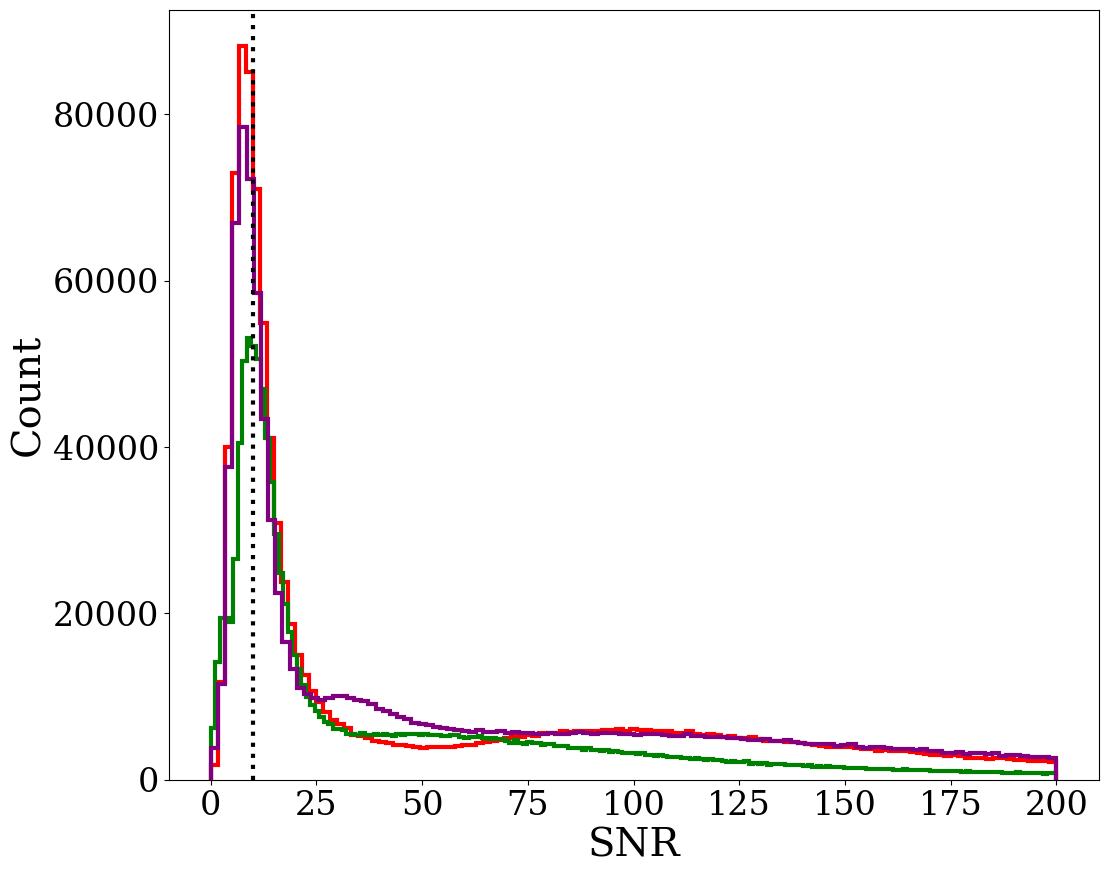

In [4]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(r_snr[(r_snr < 200) & (r_snr > 0)],
        bins = 'auto', histtype = 'step', color = 'red', linewidth = 3)
ax.hist(g_snr[(g_snr < 200) & (g_snr > 0)],
        bins = 'auto', histtype = 'step', color = 'green', linewidth = 3)
ax.hist(z_snr[(z_snr < 200) & (z_snr > 0)],
        bins = 'auto', histtype = 'step', color = 'purple', linewidth = 3)

ax.axvline(10, color = 'black', linestyle = ':', linewidth = 3)

ax.set_xlabel('SNR')
ax.set_ylabel('Count')

In [5]:
#quality cuts
snr_thresh = 10
snr_cut = (r_snr >= snr_thresh) &\
          (g_snr >= snr_thresh) &\
          (z_snr >= snr_thresh)

redshift_cut = (redshift >= 0) & (redshift < 10)

color_lo = -3
color_hi = 3
color_cut = (gr_color > color_lo) & (gr_color < color_hi) &\
            (gz_color > color_lo) & (gz_color < color_hi) &\
            (rz_color > color_lo) & (rz_color < color_hi)

log_mstar_lo = 6
log_mstar_hi = 12
log_mstar_cut = (log_mstar > log_mstar_lo) & (log_mstar < log_mstar_hi)

morphtype_cut = edr_cat['MORPHTYPE'] != 'PSF'

In [23]:
#define primary targeting region
def gr_color_condition(gr_color, r_mag):
    
    return (gr_color + 3 * r_mag) < 62
    # return (gr_color + 0.3 * r_mag) < 6.35

def rz_color_condition(rz_color, r_mag):

    return (rz_color + 0.25 * r_mag) < 5.85

def gz_color_condition(gz_color, r_mag):

    return (gz_color + 0.35 * r_mag) < 8

In [24]:
prt_gr_color_cut = gr_color_condition(gr_color,
                                      r_mag)

prt_rz_color_cut = rz_color_condition(rz_color,
                                      r_mag)

prt_gz_color_cut = gz_color_condition(gz_color,
                                      r_mag)

prt_mag_cut = r_mag > 18

/var/tmp/lsajkov/ipykernel_258529/121738950.py:4: RuntimeWarning: invalid value encountered in add
  return (gr_color + 3 * r_mag) < 62
/var/tmp/lsajkov/ipykernel_258529/121738950.py:13: RuntimeWarning: invalid value encountered in add
  return (gz_color + 0.35 * r_mag) < 8


In [25]:
total_cut = snr_cut &\
            redshift_cut &\
            color_cut &\
            log_mstar_cut &\
            morphtype_cut &\
            prt_gr_color_cut &\
            prt_rz_color_cut &\
            prt_gz_color_cut &\
            prt_mag_cut

print('Grand total of cuts:')
print(f'{np.sum(total_cut)}/{len(total_cut)} (~{int(100 * np.sum(total_cut)/len(total_cut))}%)')

Grand total of cuts:
90753/1223269 (~7%)


Text(0, 0.5, 'Count')

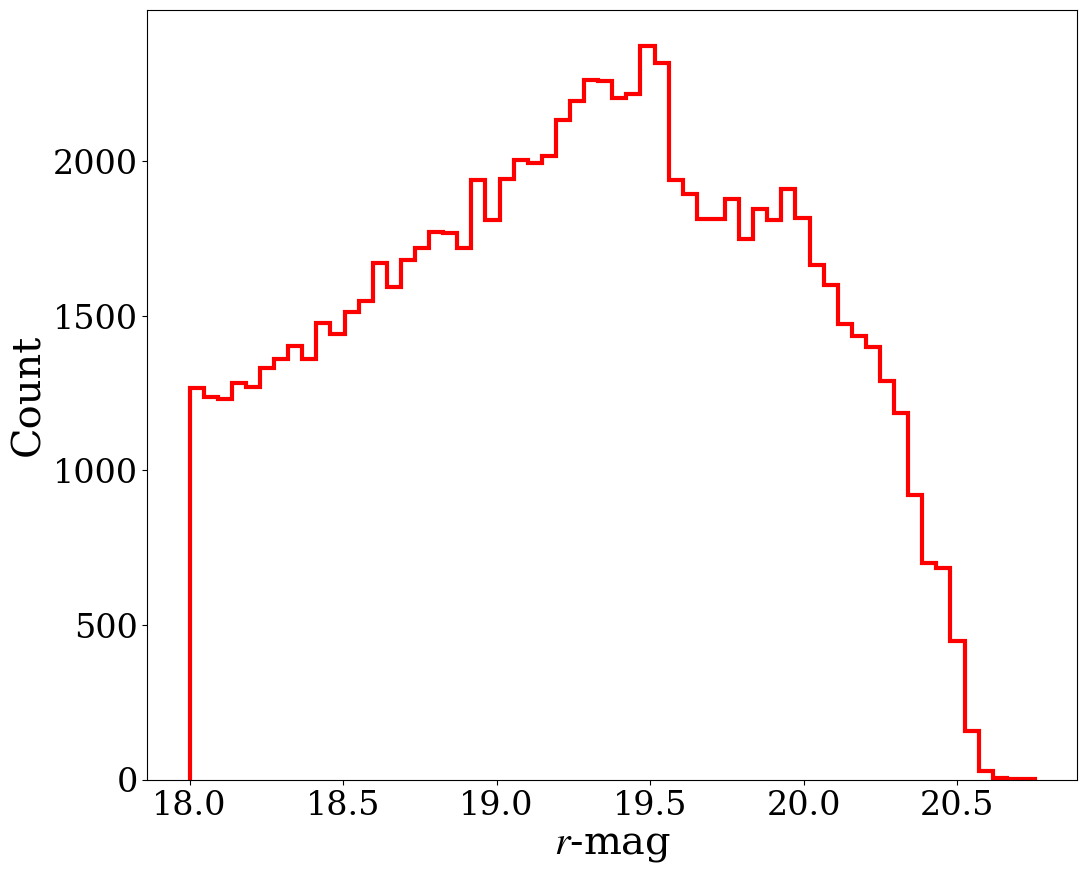

In [26]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(r_mag[total_cut],
        bins = 'auto', histtype = 'step', color = 'red', linewidth = 3)

# ax.hist(g_mag[total_cut],
#         bins = 'auto', histtype = 'step', color = 'green', linewidth = 3)

# ax.hist(z_mag[total_cut],
#         bins = 'auto', histtype = 'step', color = 'purple', linewidth = 3)

ax.set_xlabel('$r$-mag')
ax.set_ylabel('Count')

(array([1.660e+02, 1.080e+02, 1.860e+02, 4.400e+02, 7.640e+02, 9.390e+02,
        1.010e+03, 8.680e+02, 7.590e+02, 9.320e+02, 1.071e+03, 1.342e+03,
        1.257e+03, 1.735e+03, 1.606e+03, 1.726e+03, 1.990e+03, 2.253e+03,
        2.525e+03, 1.889e+03, 1.729e+03, 1.735e+03, 1.868e+03, 2.078e+03,
        1.718e+03, 2.029e+03, 2.091e+03, 2.641e+03, 2.618e+03, 2.750e+03,
        2.928e+03, 2.215e+03, 2.012e+03, 1.958e+03, 1.602e+03, 1.842e+03,
        1.896e+03, 1.797e+03, 1.833e+03, 1.860e+03, 1.719e+03, 1.625e+03,
        1.465e+03, 1.511e+03, 1.506e+03, 1.098e+03, 1.071e+03, 1.055e+03,
        1.200e+03, 1.093e+03, 9.990e+02, 1.068e+03, 9.310e+02, 7.260e+02,
        7.400e+02, 7.380e+02, 7.170e+02, 8.130e+02, 6.620e+02, 5.400e+02,
        3.830e+02, 4.130e+02, 3.460e+02, 3.540e+02, 2.750e+02, 2.150e+02,
        1.820e+02, 1.470e+02, 1.210e+02, 1.030e+02, 9.100e+01, 1.140e+02,
        6.900e+01, 7.600e+01, 4.500e+01, 5.400e+01, 3.700e+01, 5.000e+01,
        5.500e+01, 3.100e+01, 2.700e+0

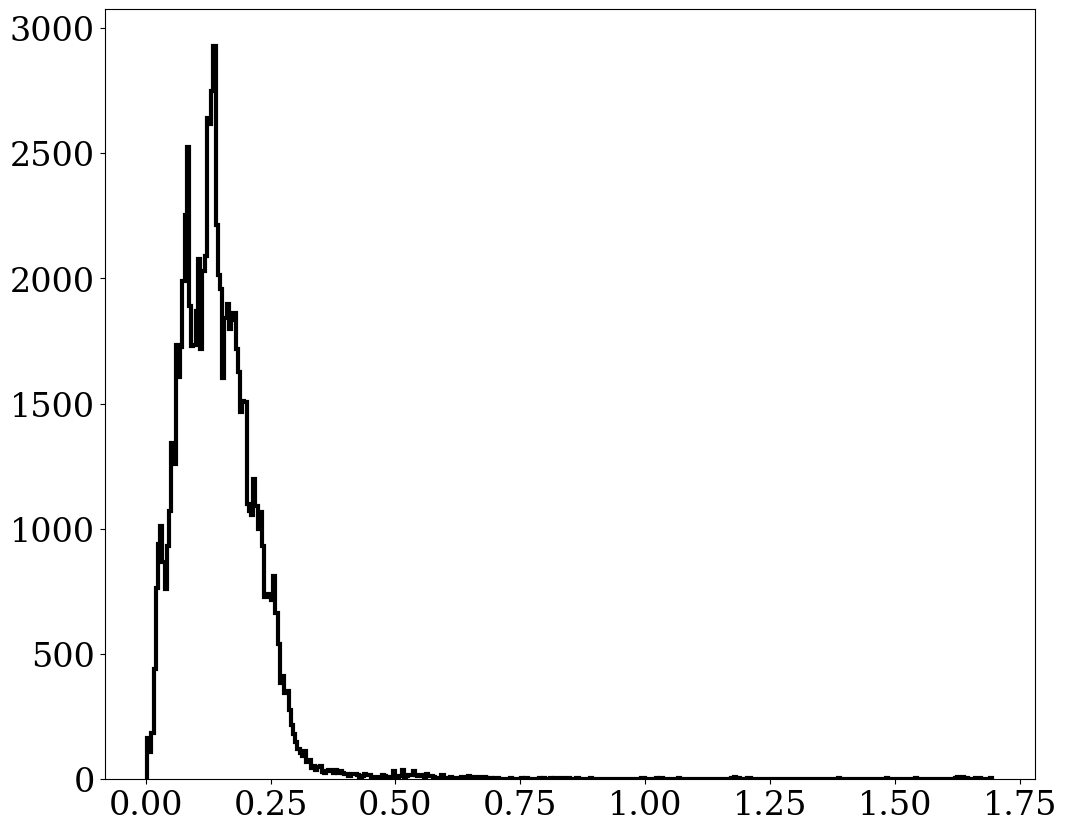

In [27]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(redshift[total_cut],
        bins = 'auto', histtype = 'step', color = 'black', linewidth = 3)

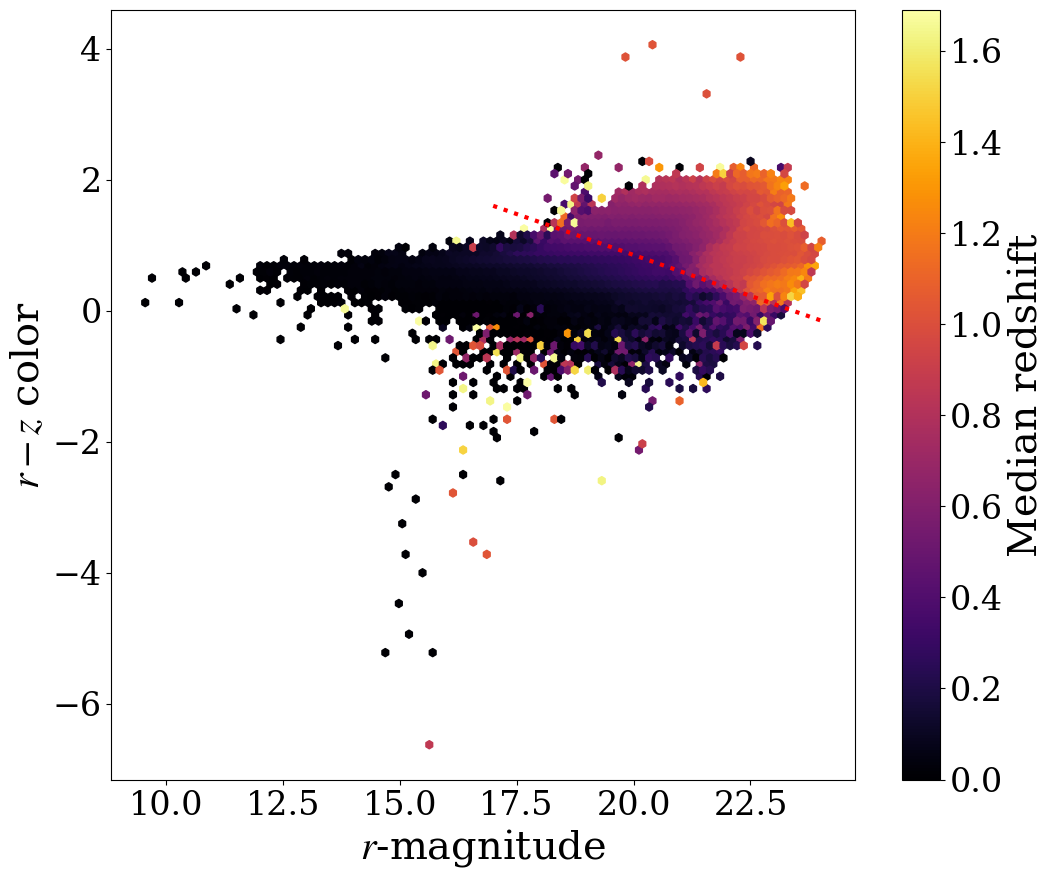

In [83]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

hxb = ax.hexbin(r_mag[snr_cut],
          rz_color[snr_cut], C = redshift[snr_cut],
          reduce_C_function = np.median,
          cmap = 'inferno')

fig.colorbar(mappable = hxb,
             label = 'Median redshift')

ax.set_xlabel('$r$-magnitude')
ax.set_ylabel('$r-z$ color')

ax.plot(np.array([17, 24]),
        5.85 - 0.25 * np.array([17, 24]), color = 'red',
        linestyle = ':', linewidth = 3)

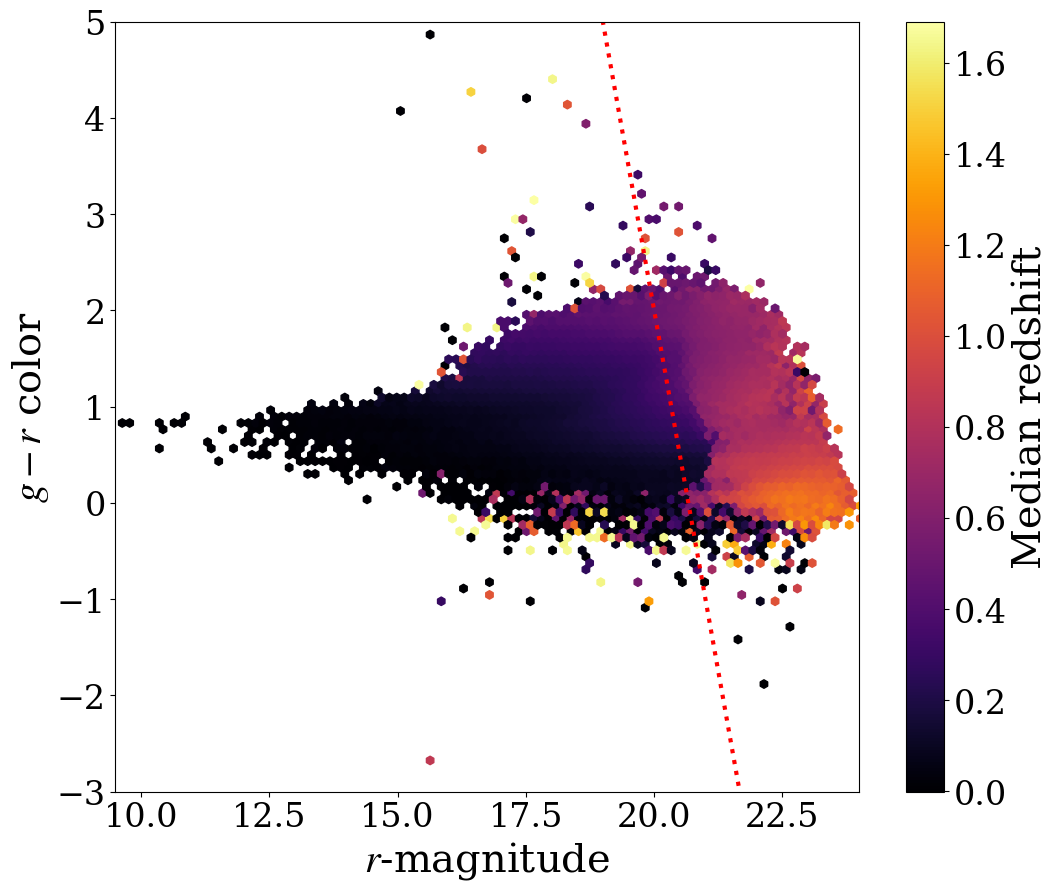

In [22]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

hxb = ax.hexbin(r_mag[snr_cut],
          gr_color[snr_cut], C = redshift[snr_cut],
          reduce_C_function = np.median,
          cmap = 'inferno')

fig.colorbar(mappable = hxb,
             label = 'Median redshift')

ax.set_xlabel('$r$-magnitude')
ax.set_ylabel('$g-r$ color')

ax.set_xlim(9.5, 24)
ax.set_ylim(-3, 5)

ax.plot(np.array([13, 24]),
        62 - 3 * np.array([13, 24]), color = 'red',
        linestyle = ':', linewidth = 3)

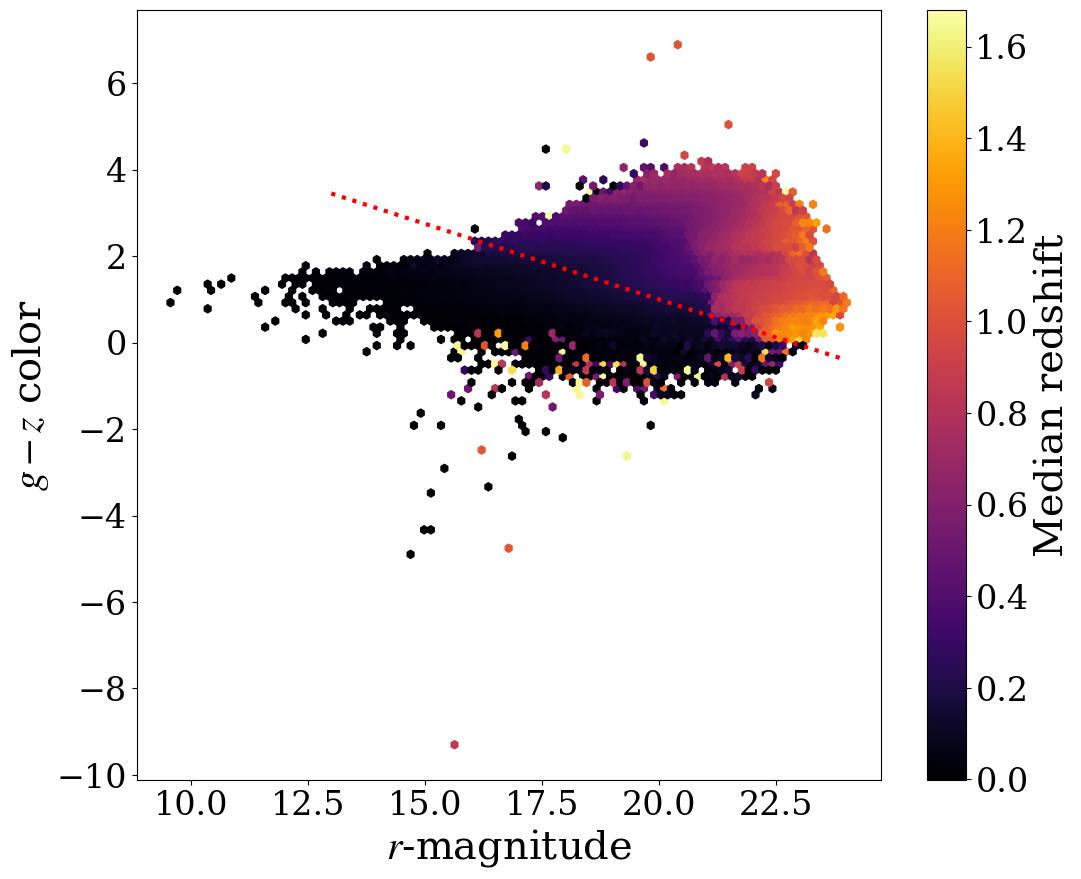

In [100]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

hxb = ax.hexbin(r_mag[snr_cut],
          gz_color[snr_cut], C = redshift[snr_cut],
          reduce_C_function = np.median,
          cmap = 'inferno')

fig.colorbar(mappable = hxb,
             label = 'Median redshift')

ax.set_xlabel('$r$-magnitude')
ax.set_ylabel('$g-z$ color')

ax.plot(np.array([13, 24]),
        8 - 0.35 * np.array([13, 24]), color = 'red',
        linestyle = ':', linewidth = 3)

(array([8.000e+00, 8.000e+00, 7.000e+00, 1.000e+01, 8.000e+00, 6.000e+00,
        1.000e+01, 1.900e+01, 1.300e+01, 1.300e+01, 1.400e+01, 1.200e+01,
        2.200e+01, 1.400e+01, 2.100e+01, 2.200e+01, 1.600e+01, 3.100e+01,
        2.400e+01, 2.200e+01, 1.800e+01, 2.900e+01, 2.200e+01, 2.500e+01,
        2.900e+01, 3.300e+01, 3.900e+01, 3.800e+01, 3.000e+01, 4.200e+01,
        5.000e+01, 5.900e+01, 5.800e+01, 5.200e+01, 5.700e+01, 7.500e+01,
        8.200e+01, 8.600e+01, 9.800e+01, 9.900e+01, 1.060e+02, 1.000e+02,
        1.160e+02, 1.410e+02, 1.630e+02, 1.790e+02, 1.700e+02, 1.940e+02,
        1.940e+02, 2.010e+02, 2.280e+02, 2.400e+02, 2.640e+02, 2.890e+02,
        3.070e+02, 3.520e+02, 3.380e+02, 3.720e+02, 3.990e+02, 3.980e+02,
        4.230e+02, 4.490e+02, 4.860e+02, 5.320e+02, 5.310e+02, 5.530e+02,
        5.960e+02, 6.510e+02, 6.690e+02, 7.310e+02, 7.560e+02, 9.040e+02,
        8.800e+02, 9.610e+02, 9.640e+02, 1.054e+03, 1.102e+03, 1.189e+03,
        1.260e+03, 1.326e+03, 1.374e+0

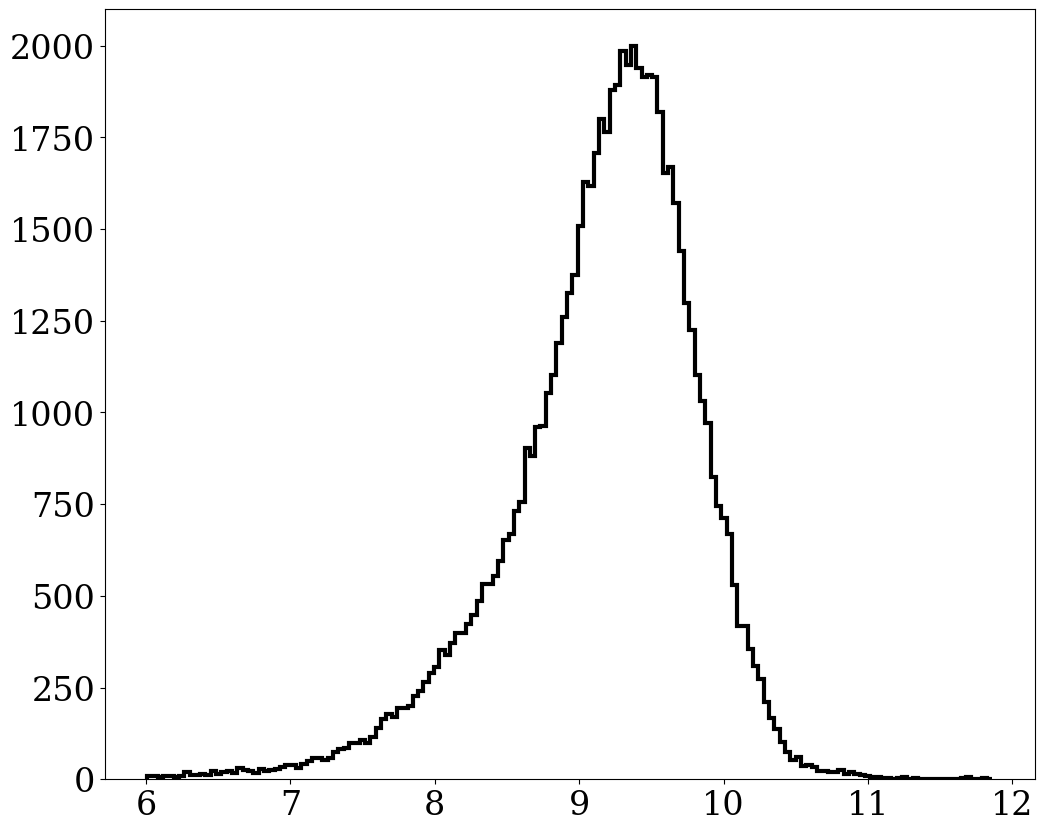

In [77]:
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()

ax.hist(log_mstar[total_cut],
        bins = 'auto', histtype = 'step', color = 'black', linewidth = 3)

In [ ]:
plot_cut = snr_cut &\
           redshift_cut &\
           color_cut &\
           log_mstar_cut &\
           morphtype_cut &\
           prt_gr_color_cut &\

In [ ]:
edr_cat['FLUX_G']